In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | emerald
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | la baneza
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | balabac
Processing Record 20 of Set 1 | les cayes
Processing Record 21 of Set 1 | garowe
Process

Processing Record 36 of Set 4 | jalu
Processing Record 37 of Set 4 | puerto ayacucho
Processing Record 38 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 4 | batagay
Processing Record 40 of Set 4 | bentiu
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | barcelona
Processing Record 43 of Set 4 | santa luzia
Processing Record 44 of Set 4 | afgoye
City not found. Skipping...
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | nizwa
Processing Record 49 of Set 4 | vardo
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | coihaique
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | taoudenni
Processing Record 4 of Set 5 | kaseda
Processing Record 5 of Set 5 | zhuhai
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | mys shmidta
City not found. Skipping...
Processing 

Processing Record 25 of Set 8 | vostok
Processing Record 26 of Set 8 | ubrique
Processing Record 27 of Set 8 | clyde river
Processing Record 28 of Set 8 | faanui
Processing Record 29 of Set 8 | olga
Processing Record 30 of Set 8 | raudeberg
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | mirabela
Processing Record 34 of Set 8 | sao sebastiao
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | charlestown
Processing Record 37 of Set 8 | kintinku
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | manohar thana
Processing Record 40 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 41 of Set 8 | san francisco
Processing Record 42 of Set 8 | eureka
Processing Record 43 of Set 8 | yalchiki
City not found. Skipping...
Processing Record 44 of Set 8 | ban nahin
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | ginir
Processing Record 47 of Set 8 | b

Processing Record 13 of Set 12 | nelson bay
Processing Record 14 of Set 12 | abomsa
Processing Record 15 of Set 12 | bani
Processing Record 16 of Set 12 | sao felix do xingu
Processing Record 17 of Set 12 | maniitsoq
Processing Record 18 of Set 12 | bargal
City not found. Skipping...
Processing Record 19 of Set 12 | oussouye
Processing Record 20 of Set 12 | fukue
Processing Record 21 of Set 12 | gerash
Processing Record 22 of Set 12 | west richland
Processing Record 23 of Set 12 | lujan
Processing Record 24 of Set 12 | kalush
Processing Record 25 of Set 12 | tansen
Processing Record 26 of Set 12 | vila
Processing Record 27 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 12 | watsonville
Processing Record 29 of Set 12 | talcahuano
Processing Record 30 of Set 12 | lososina
Processing Record 31 of Set 12 | epe
Processing Record 32 of Set 12 | barcelos
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | celestun
Processing Record 35 

In [7]:
len(city_data)

575

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,69.96,94,40,4.61,TO,2021-09-20 11:42:03
1,Rikitea,-23.1203,-134.9692,73.09,77,19,15.84,PF,2021-09-20 11:42:03
2,Arraial Do Cabo,-22.9661,-42.0278,71.56,94,90,8.05,BR,2021-09-20 11:42:03
3,Ahipara,-35.1667,173.1667,52.00,86,6,3.00,NZ,2021-09-20 11:42:03
4,Nanortalik,60.1432,-45.2371,37.17,83,31,11.45,GL,2021-09-20 11:42:04
5,Lazaro Cardenas,17.9583,-102.2000,75.61,89,73,5.10,MX,2021-09-20 11:42:04
6,Emerald,-23.5333,148.1667,78.94,34,40,12.66,AU,2021-09-20 11:42:04
7,Port Alfred,-33.5906,26.8910,65.75,64,65,22.37,ZA,2021-09-20 11:42:04
8,Hilo,19.7297,-155.0900,73.62,81,20,5.75,US,2021-09-20 11:42:04
9,La Baneza,42.3003,-5.8977,67.80,36,36,8.95,ES,2021-09-20 11:42:04


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-09-20 11:42:03,-21.2000,-175.2000,69.96,94,40,4.61
1,Rikitea,PF,2021-09-20 11:42:03,-23.1203,-134.9692,73.09,77,19,15.84
2,Arraial Do Cabo,BR,2021-09-20 11:42:03,-22.9661,-42.0278,71.56,94,90,8.05
3,Ahipara,NZ,2021-09-20 11:42:03,-35.1667,173.1667,52.00,86,6,3.00
4,Nanortalik,GL,2021-09-20 11:42:04,60.1432,-45.2371,37.17,83,31,11.45


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

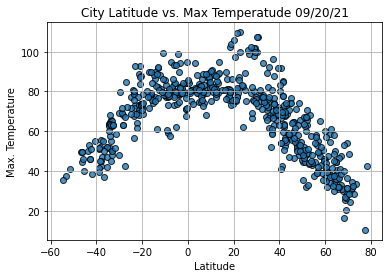

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperatude ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature')
plt.grid(True)

# Save the fig
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()


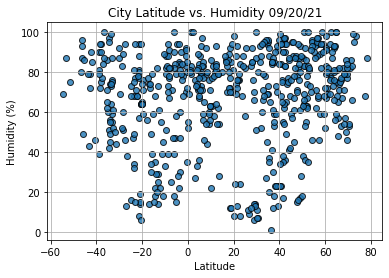

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

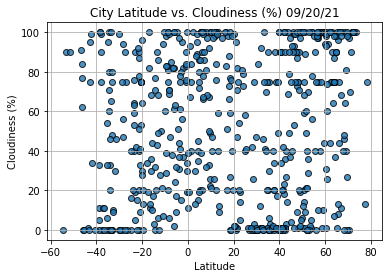

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

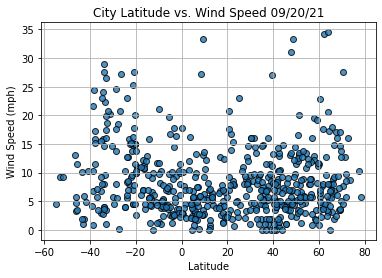

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()